In [63]:
# Perform Principal component analysis and perform clustering using first 
# 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
# optimum number of clusters and check whether we have obtained same number of clusters with the original data 
# (class column we have ignored at the begining who shows it has 3 clusters)df

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

In [65]:
df=pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [66]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [67]:
df.shape

(178, 14)

In [68]:
df.size

2492

In [69]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [70]:
df.duplicated().any()

False

In [71]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [72]:
features=df.drop('Type',axis=1)
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
std_sca=StandardScaler()

In [75]:
features=std_sca.fit_transform(features)
features

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [76]:
features= pd.DataFrame(features,columns=['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline'])
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [78]:
target=df[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [79]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)

In [80]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(133, 13)
(45, 13)
(133, 1)
(45, 1)


In [81]:
from sklearn.decomposition import PCA

In [82]:
pca=PCA(n_components=3)

In [83]:
pca.fit(x_train)
pca.fit(x_test)

PCA(n_components=3)

In [84]:
x_train_new= pca.transform(x_train)
x_test_new= pca.transform(x_test)

In [85]:
print(x_train_new.shape)
print(x_test_new.shape)

(133, 3)
(45, 3)


In [86]:
principal_components = pca.fit_transform(features)
principal_components

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

### Hierarchial Clustering

In [87]:
from scipy.cluster.hierarchy import dendrogram,linkage
import scipy.cluster.hierarchy as sch

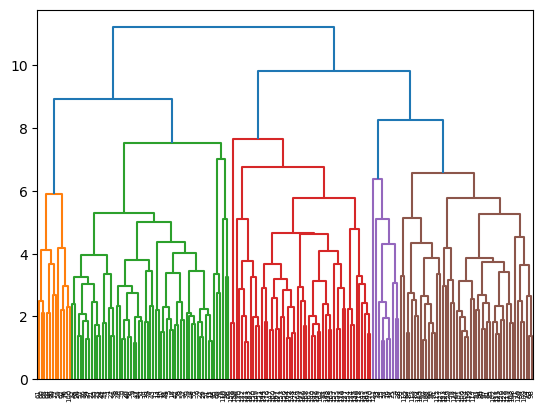

In [88]:
dendrogram=sch.dendrogram(sch.linkage(features,method='complete'))

In [89]:
from sklearn.cluster import AgglomerativeClustering

In [90]:
agg= AgglomerativeClustering(n_clusters=3,linkage='ward')

In [91]:
cluster=agg.fit(features)

In [92]:
cluster.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [93]:
np.unique(cluster.labels_)

array([0, 1, 2], dtype=int64)

In [94]:
from sklearn.metrics import silhouette_score

In [95]:
silhouette_score(features,cluster.labels_)

0.2774439826952265

In [96]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631])

### K-means Clustering

In [97]:
from sklearn.cluster import KMeans

In [98]:
kmeans=KMeans(n_clusters=4)

In [99]:
cluster=kmeans.fit(features)
cluster

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [100]:
np.unique(cluster.labels_)

array([0, 1, 2, 3])

In [101]:
cluster.cluster_centers_

array([[ 0.90537676, -0.29781954,  0.29338792, -0.69473572,  0.55724067,
         0.89427402,  0.95416129, -0.60903111,  0.59829118,  0.19364983,
         0.47074532,  0.77709639,  1.1783867 ],
       [-0.71721705, -0.71430849, -1.24780669, -0.43434992, -0.35207078,
        -0.06791496, -0.0814095 , -0.3958531 , -0.24845949, -0.78186325,
         0.59164839,  0.17267678, -0.61947836],
       [ 0.17711479,  0.90650664,  0.21596904,  0.55103983, -0.07734512,
        -0.99010047, -1.22711807,  0.71348704, -0.76127859,  0.95438352,
        -1.19006316, -1.28939841, -0.39632062],
       [-1.07235572, -0.11616109,  0.36303559,  0.77141565, -0.48310022,
        -0.02822084,  0.21519168,  0.37004544,  0.30455313, -0.92619525,
         0.33902188,  0.35896943, -0.8129444 ]])

In [102]:
features['cluster']=cluster.labels_   
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,2
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,2
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,2
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,2


In [103]:
import seaborn as sns

C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hpriy\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


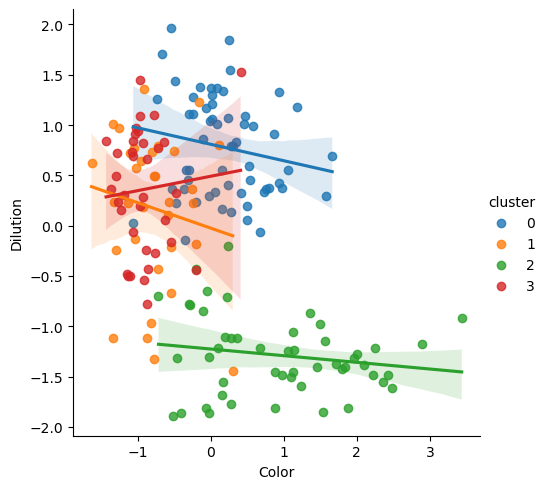

In [104]:
sns.lmplot(data=features,x='Color',y='Dilution',hue='cluster')

##### optimum value of the cluster

In [105]:
cluster.inertia_

1186.9103834015236

In [106]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hpriy\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

In [107]:
inertia

[2544.7022471910113,
 1772.3460152952628,
 1351.348123335077,
 1186.9103834015236,
 1118.4785540297264,
 1070.2993378763877,
 1010.9107322877279,
 959.1174372258098,
 922.2893485077133,
 878.9794048671322]

Text(0.5, 1.0, 'Elbow Curve for K-Means Clustering')

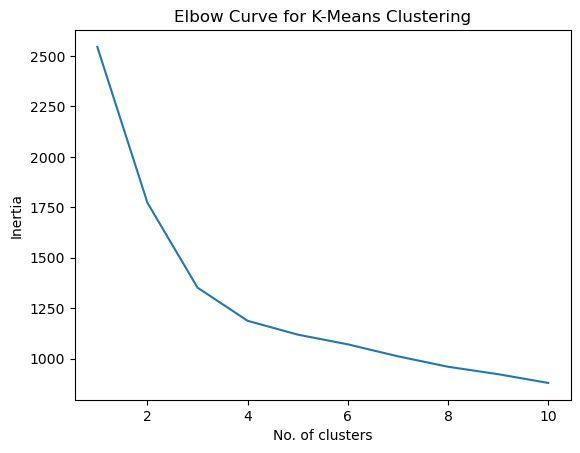

In [108]:
plt.plot(range(1,11),inertia)
plt.xlabel('No. of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-Means Clustering')

In [109]:
kmeans.labels_

array([4, 4, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4, 4, 4, 1,
       4, 1, 1, 9, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 5, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 4, 5, 2, 2, 5, 5, 8, 9,
       5, 5, 2, 7, 2, 9, 5, 1, 5, 5, 5, 2, 7, 9, 5, 5, 8, 0, 9, 5, 8, 8,
       8, 8, 8, 8, 8, 5, 5, 7, 2, 5, 5, 9, 5, 5, 9, 5, 5, 8, 5, 8, 5, 9,
       9, 5, 8, 8, 8, 8, 5, 8, 0, 5, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 2, 6,
       6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 3, 6, 6, 6, 6, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 0, 6, 3, 6, 6, 0, 3, 3, 0, 6, 6,
       3, 3])

In [110]:
silhouette_score(features,kmeans.labels_)

0.1607513227218999

### Comparison with Original Data Clusters:

In [111]:
from sklearn.metrics import adjusted_rand_score

In [112]:
ari_hc=adjusted_rand_score(df['Type'],cluster.labels_)
ari_hc

0.7317584936177877

In [113]:
ari_kc=adjusted_rand_score(df['Type'],kmeans.labels_)
ari_kc

0.3903383599558175